In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError, MeanAbsoluteError
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Creating multiple dataframe with different "look back" periods
# The periods are 1 day, 3 days. 7 days. 15 days. 30 days and 60 days
# The look back periods should be in the form of a list
# For example, if the look back period is 3, then the dataframe should have 3 columns
# Date, Close, [Close(t-1), Close(t-2), Close(t-3)]

def create_look_back_arrays(df, window_size = 1):
    df = df.drop(columns = ['Date'])
    df_as_np = df.to_numpy()
    X = []
    Y = []
    for i in range(len(df_as_np) - window_size):
        X.append(df_as_np[i:i+window_size])
        Y.append(df_as_np[i+window_size])
    return np.array(X), np.array(Y)

In [3]:
df = pd.read_csv('../Data/ethereum_data.csv')

In [4]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
1,2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2,2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
3,2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
4,2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984
...,...,...,...,...,...,...,...
1660,2022-05-27,1802.543823,1814.656494,1721.264771,1724.922852,1724.922852,25470760032
1661,2022-05-28,1724.635986,1757.941772,1724.635986,1757.941772,1757.941772,23214777872
1662,2022-05-29,1792.184448,1818.776611,1765.937378,1812.031006,1812.031006,10642556101
1663,2022-05-30,1811.885986,2005.210815,1804.456055,1996.441284,1996.441284,19580808705


In [5]:
df = df[['Date', 'Close']]
scaler = MinMaxScaler()
df['Close'] = scaler.fit_transform(df[['Close']])

/var/folders/76/w363ly_90ln6pf3txlrc64bw0000gn/T/ipykernel_45291/263429702.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Close'] = scaler.fit_transform(df[['Close']])


In [6]:
df

,Date,Close
0,2017-11-09,0.050040
1,2017-11-10,0.045464
2,2017-11-11,0.048727
3,2017-11-12,0.047295
4,2017-11-13,0.049158
...,...,...
1660,2022-05-27,0.347016
1661,2022-05-28,0.354000
1662,2022-05-29,0.365441
1663,2022-05-30,0.404446


In [7]:
lstm_1 = load_model('Models/lstm_1.h5')
lstm_3 = load_model('Models/lstm_3.h5')
lstm_7 = load_model('Models/lstm_7.h5')
lstm_15 = load_model('Models/lstm_15.h5')
lstm_30 = load_model('Models/lstm_30.h5')
lstm_60 = load_model('Models/lstm_60.h5')

gru_1 = load_model('Models/gru_1.h5')
gru_3 = load_model('Models/gru_3.h5')
gru_7 = load_model('Models/gru_7.h5')
gru_15 = load_model('Models/gru_15.h5')
gru_30 = load_model('Models/gru_30.h5')
gru_60 = load_model('Models/gru_60.h5')

In [8]:
# creating a look back window of 60 days 
X, y = create_look_back_arrays(df, 60)

In [9]:
X.shape, y.shape

((1605, 60, 1), (1605, 1))

In [10]:
lstm_1_predictions = []
lstm_3_predictions = []
lstm_7_predictions = []
lstm_15_predictions = []
lstm_30_predictions = []
lstm_60_predictions = []

gru_1_predictions = []
gru_3_predictions = []
gru_7_predictions = []
gru_15_predictions = []
gru_30_predictions = []
gru_60_predictions = []

In [11]:
X.shape

(1605, 60, 1)

In [12]:
X[0], y[0]

(array([[0.0500395 ],
        [0.0454642 ],
        [0.04872747],
        [0.04729487],
        [0.0491579 ],
        [0.05358176],
        [0.05267774],
        [0.05216312],
        [0.05247405],
        [0.05569289],
        [0.0571257 ],
        [0.05973666],
        [0.05839797],
        [0.06268138],
        [0.06892405],
        [0.08261865],
        [0.08079221],
        [0.0818612 ],
        [0.08377014],
        [0.08219371],
        [0.07259534],
        [0.07673914],
        [0.08084805],
        [0.08019425],
        [0.08070273],
        [0.08162304],
        [0.08015872],
        [0.0728206 ],
        [0.07405162],
        [0.07862523],
        [0.08232062],
        [0.07559844],
        [0.09112687],
        [0.11995542],
        [0.1308138 ],
        [0.12934354],
        [0.12693903],
        [0.12942667],
        [0.13445355],
        [0.15024744],
        [0.15705359],
        [0.1554171 ],
        [0.15583526],
        [0.12491102],
        [0.13432919],
        [0

In [13]:
X[0][-1].reshape(1, 1)

array([[0.22608115]])

In [14]:
lstm_1.predict(X[0][-1].reshape(1, 1, 1)), y[0]

1/1 [==============================] - 0s 218ms/step


(array([[0.22602622]], dtype=float32), array([0.22509972]))

In [15]:
scaler.inverse_transform(lstm_1.predict(X[0][-1].reshape(1, 1, 1)))

1/1 [==============================] - 0s 9ms/step


array([[1152.9103]], dtype=float32)

In [16]:
scaler.inverse_transform(y[0].reshape(1, 1))

array([[1148.5300293]])

In [17]:
X[0], X[0, -3:, -1].reshape(-1, 3, 1)

(array([[0.0500395 ],
        [0.0454642 ],
        [0.04872747],
        [0.04729487],
        [0.0491579 ],
        [0.05358176],
        [0.05267774],
        [0.05216312],
        [0.05247405],
        [0.05569289],
        [0.0571257 ],
        [0.05973666],
        [0.05839797],
        [0.06268138],
        [0.06892405],
        [0.08261865],
        [0.08079221],
        [0.0818612 ],
        [0.08377014],
        [0.08219371],
        [0.07259534],
        [0.07673914],
        [0.08084805],
        [0.08019425],
        [0.08070273],
        [0.08162304],
        [0.08015872],
        [0.0728206 ],
        [0.07405162],
        [0.07862523],
        [0.08232062],
        [0.07559844],
        [0.09112687],
        [0.11995542],
        [0.1308138 ],
        [0.12934354],
        [0.12693903],
        [0.12942667],
        [0.13445355],
        [0.15024744],
        [0.15705359],
        [0.1554171 ],
        [0.15583526],
        [0.12491102],
        [0.13432919],
        [0

In [18]:
# Creating the list of X for each model.
# Since all the models predict the next day's closing price and have differnet look back windows,
# we'll use the 60 day look back window and extract the look back window for each model
# For example, in the 60 day look back window, if we want to use the 3 day model, we'll use the last 3 days

# Extracting the different look back windows for each model
one_day_window = X[:, -1, -1].reshape(-1, 1, 1)
three_day_window = X[:, -3:, -1].reshape(-1, 3, 1)
seven_day_window = X[:, -7:, -1].reshape(-1, 7, 1)
fifteen_day_window = X[:, -15:, -1].reshape(-1, 15, 1)
thirty_day_window = X[:, -30:, -1].reshape(-1, 30, 1)
sixty_day_window = X[:, :, -1].reshape(-1, 60, 1)

In [19]:
# Predict the prices through the model now
lstm_1_predictions = scaler.inverse_transform(lstm_1.predict(one_day_window))
lstm_3_predictions = scaler.inverse_transform(lstm_3.predict(three_day_window))
lstm_7_predictions = scaler.inverse_transform(lstm_7.predict(seven_day_window))
lstm_15_predictions = scaler.inverse_transform(lstm_15.predict(fifteen_day_window))
lstm_30_predictions = scaler.inverse_transform(lstm_30.predict(thirty_day_window))
lstm_60_predictions = scaler.inverse_transform(lstm_60.predict(sixty_day_window))

gru_1_predictions = scaler.inverse_transform(gru_1.predict(one_day_window))
gru_3_predictions = scaler.inverse_transform(gru_3.predict(three_day_window))
gru_7_predictions = scaler.inverse_transform(gru_7.predict(seven_day_window))
gru_15_predictions = scaler.inverse_transform(gru_15.predict(fifteen_day_window))
gru_30_predictions = scaler.inverse_transform(gru_30.predict(thirty_day_window))
gru_60_predictions = scaler.inverse_transform(gru_60.predict(sixty_day_window))

51/51 [==============================] - 0s 2ms/step


In [20]:
lstm_1_predictions.shape, lstm_3_predictions.shape, lstm_7_predictions.shape, lstm_15_predictions.shape, lstm_30_predictions.shape, lstm_60_predictions.shape

((1605, 1), (1605, 1), (1605, 1), (1605, 1), (1605, 1), (1605, 1))

In [21]:
gru_1_predictions.shape, gru_3_predictions.shape, gru_7_predictions.shape, gru_15_predictions.shape, gru_30_predictions.shape, gru_60_predictions.shape

((1605, 1), (1605, 1), (1605, 1), (1605, 1), (1605, 1), (1605, 1))

In [22]:
y.shape

(1605, 1)

In [23]:
# Creating a dataframe with all the predictions and the actual values
predictions_df = pd.DataFrame({'Actual': scaler.inverse_transform(y.reshape(-1, 1)).reshape(-1), 
                               'LSTM_1': lstm_1_predictions.reshape(-1), 
                               'LSTM_3': lstm_3_predictions.reshape(-1),
                               'LSTM_7': lstm_7_predictions.reshape(-1),
                               'LSTM_15': lstm_15_predictions.reshape(-1),
                               'LSTM_30': lstm_30_predictions.reshape(-1),
                               'LSTM_60': lstm_60_predictions.reshape(-1),
                               'GRU_1': gru_1_predictions.reshape(-1),
                               'GRU_3': gru_3_predictions.reshape(-1),
                               'GRU_7': gru_7_predictions.reshape(-1),
                               'GRU_15': gru_15_predictions.reshape(-1),
                               'GRU_30': gru_30_predictions.reshape(-1),
                               'GRU_60': gru_60_predictions.reshape(-1)}, index = df['Date'][60:])

In [24]:
predictions_df

,Actual,LSTM_1,LSTM_3,LSTM_7,LSTM_15,LSTM_30,LSTM_60,GRU_1,GRU_3,GRU_7,GRU_15,GRU_30,GRU_60
Date,,,,,,,,,,,,,
2018-01-08,1148.530029,1152.910278,1095.450317,1070.382812,1076.932373,1097.886475,768.600952,1156.603271,1105.441040,1120.444092,1150.889893,1117.988647,1158.431519
2018-01-09,1299.739990,1148.181030,1143.450317,1116.123047,1125.222656,1148.505981,789.842529,1151.894775,1141.408325,1158.696289,1182.541748,1156.841797,1194.267700
2018-01-10,1255.819946,1302.730103,1234.103760,1186.953979,1203.992188,1210.067139,815.636902,1305.455444,1242.340942,1255.366699,1293.724609,1252.674927,1298.566162
2018-01-11,1154.930054,1257.749146,1266.927368,1235.364624,1251.677612,1247.015381,841.764771,1260.829102,1260.341064,1284.468140,1306.937256,1281.636353,1320.258057
2018-01-12,1273.199951,1154.704224,1247.973389,1244.297974,1254.878662,1258.786499,866.299866,1158.389648,1211.003052,1238.845947,1235.789795,1238.760254,1260.325317
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-27,1724.922852,1824.268677,1935.028076,1980.955322,2004.271484,2050.084229,2101.181396,1818.984009,1876.493896,1907.144165,1881.369507,1905.460205,1897.417725
2022-05-28,1757.941772,1741.940552,1844.042725,1916.342285,1933.552979,1961.344238,2074.741211,1738.387573,1785.824463,1813.917114,1783.245850,1813.792847,1798.437134
2022-05-29,1812.031006,1776.327515,1795.033569,1869.726929,1890.606934,1914.770752,2050.200439,1772.072388,1763.247681,1788.994507,1777.012939,1786.788696,1779.755127


# LSTM Meta Model

In [25]:
scaler = MinMaxScaler()
predictions_df['Actual'] = scaler.fit_transform(predictions_df[['Actual']])
predictions_df['LSTM_1'] = scaler.fit_transform(predictions_df[['LSTM_1']])
#predictions_df['LSTM_3'] = scaler.fit_transform(predictions_df[['LSTM_3']])
#predictions_df['LSTM_7'] = scaler.fit_transform(predictions_df[['LSTM_7']])
#predictions_df['LSTM_15'] = scaler.fit_transform(predictions_df[['LSTM_15']])
#predictions_df['LSTM_30'] = scaler.fit_transform(predictions_df[['LSTM_30']])
#predictions_df['LSTM_60'] = scaler.fit_transform(predictions_df[['LSTM_60']])
#predictions_df['GRU_1'] = scaler.fit_transform(predictions_df[['GRU_1']])
#predictions_df['GRU_3'] = scaler.fit_transform(predictions_df[['GRU_3']])
#predictions_df['GRU_7'] = scaler.fit_transform(predictions_df[['GRU_7']])
#predictions_df['GRU_15'] = scaler.fit_transform(predictions_df[['GRU_15']])
#predictions_df['GRU_30'] = scaler.fit_transform(predictions_df[['GRU_30']])
predictions_df['GRU_60'] = scaler.fit_transform(predictions_df[['GRU_60']])

predictions_df = predictions_df[['Actual', 'LSTM_1', 'GRU_60']]

In [26]:
predictions_df

,Actual,LSTM_1,GRU_60
Date,,,
2018-01-08,0.225100,0.241420,0.231424
2018-01-09,0.257083,0.240349,0.239202
2018-01-10,0.247793,0.275341,0.261839
2018-01-11,0.226453,0.265157,0.266547
2018-01-12,0.251469,0.241826,0.253539
...,...,...,...
2022-05-27,0.347016,0.393424,0.391813
2022-05-28,0.354000,0.374784,0.370331
2022-05-29,0.365441,0.382570,0.366276


Creating a LSTM meta model to predict the next day's closing price.
The meta model will use the predictions of the other models as features

In [27]:
meta_training_X =  predictions_df.iloc[:int(len(predictions_df) * 0.8)].drop(columns = ['Actual'])
meta_training_y = predictions_df.iloc[:int(len(predictions_df) * 0.8)]['Actual']

meta_validation_X = predictions_df.iloc[int(len(predictions_df) * 0.8):int(len(predictions_df) * 0.9)].drop(columns = ['Actual'])
meta_validation_y = predictions_df.iloc[int(len(predictions_df) * 0.8):int(len(predictions_df) * 0.9)]['Actual']

meta_testing_X = predictions_df.iloc[int(len(predictions_df) * 0.9):].drop(columns = ['Actual'])
meta_testing_y = predictions_df.iloc[int(len(predictions_df) * 0.9):]['Actual']

In [28]:
meta_training_X.shape, meta_training_y.shape, meta_validation_X.shape, meta_validation_y.shape, meta_testing_X.shape, meta_testing_y.shape

((1284, 2), (1284,), (160, 2), (160,), (161, 2), (161,))

In [29]:
meta_training_X

,LSTM_1,GRU_60
Date,,
2018-01-08,0.241420,0.231424
2018-01-09,0.240349,0.239202
2018-01-10,0.275341,0.261839
2018-01-11,0.265157,0.266547
2018-01-12,0.241826,0.253539
...,...,...
2021-07-10,0.474891,0.456182
2021-07-11,0.466462,0.447932
2021-07-12,0.473212,0.449364


In [30]:
# The entire row is the input for the meta model
# reshape the input to be 3D [length, 12, 1]
meta_training_X = meta_training_X.to_numpy().reshape(-1, 2, 1)
meta_validation_X = meta_validation_X.to_numpy().reshape(-1, 2, 1)
meta_testing_X = meta_testing_X.to_numpy().reshape(-1, 2, 1)

meta_training_X.shape, meta_validation_X.shape, meta_testing_X.shape

((1284, 2, 1), (160, 2, 1), (161, 2, 1))

In [31]:
meta_training_X[0]

array([[0.24141994],
       [0.2314244 ]], dtype=float32)

In [32]:
meta_training_y = meta_training_y.to_numpy().reshape(-1, 1)
meta_validation_y = meta_validation_y.to_numpy().reshape(-1, 1)
meta_testing_y = meta_testing_y.to_numpy().reshape(-1, 1)

meta_training_y.shape, meta_validation_y.shape, meta_testing_y.shape

((1284, 1), (160, 1), (161, 1))

In [33]:
meta_training_y[0]

array([0.22509972])

In [34]:
meta_model = Sequential()
meta_model.add(InputLayer(input_shape = (2, 1)))
meta_model.add(LSTM(512))
meta_model.add(Dense(1, activation = 'linear'))

meta_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 512)               1052672   
                                                                 
 dense (Dense)               (None, 1)                 513       
                                                                 
Total params: 1053185 (4.02 MB)
Trainable params: 1053185 (4.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [35]:
cp = ModelCheckpoint('models/meta_model.h5', save_best_only = True)
meta_model.compile(optimizer = Adam(learning_rate = 0.0001), loss = MeanSquaredError(), metrics = [RootMeanSquaredError(), MeanAbsoluteError()])

In [36]:
meta_model.fit(meta_training_X, meta_training_y, epochs = 100, validation_data = (meta_validation_X, meta_validation_y), callbacks = [cp], batch_size = 256)

Epoch 1/100
6/6 [==============================] - 1s 58ms/step - loss: 0.0314 - root_mean_squared_error: 0.1772 - mean_absolute_error: 0.1002 - val_loss: 0.5013 - val_root_mean_squared_error: 0.7080 - val_mean_absolute_error: 0.6921
Epoch 2/100
6/6 [==============================] - 0s 20ms/step - loss: 0.0283 - root_mean_squared_error: 0.1682 - mean_absolute_error: 0.0906 - val_loss: 0.4666 - val_root_mean_squared_error: 0.6831 - val_mean_absolute_error: 0.6674
Epoch 3/100
1/6 [====>.........................] - ETA: 0s - loss: 0.0339 - root_mean_squared_error: 0.1842 - mean_absolute_error: 0.0976

/opt/miniconda3/envs/eth/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 22ms/step - loss: 0.0255 - root_mean_squared_error: 0.1598 - mean_absolute_error: 0.0830 - val_loss: 0.4318 - val_root_mean_squared_error: 0.6571 - val_mean_absolute_error: 0.6415
Epoch 4/100
6/6 [==============================] - 0s 22ms/step - loss: 0.0230 - root_mean_squared_error: 0.1517 - mean_absolute_error: 0.0779 - val_loss: 0.3989 - val_root_mean_squared_error: 0.6316 - val_mean_absolute_error: 0.6161
Epoch 5/100
6/6 [==============================] - 0s 22ms/step - loss: 0.0207 - root_mean_squared_error: 0.1438 - mean_absolute_error: 0.0750 - val_loss: 0.3661 - val_root_mean_squared_error: 0.6051 - val_mean_absolute_error: 0.5898
Epoch 6/100
6/6 [==============================] - 0s 23ms/step - loss: 0.0185 - root_mean_squared_error: 0.1359 - mean_absolute_error: 0.0733 - val_loss: 0.3357 - val_root_mean_squared_error: 0.5794 - val_mean_absolute_error: 0.5642
Epoch 7/100
6/6 [==============================] - 0s 23ms/step - loss: 0.01

In [37]:
meta_model = load_model('models/meta_model.h5')

In [38]:
test_predictions = meta_model.predict(meta_testing_X)
test_results = pd.DataFrame({'Actual': meta_testing_y.flatten(), 'Predicted': test_predictions.flatten()})
test_results

6/6 [==============================] - 0s 2ms/step


,Actual,Predicted
0,0.824444,0.814875
1,0.851078,0.809617
2,0.838380,0.830699
3,0.847961,0.822002
4,0.842472,0.829119
...,...,...
156,0.347016,0.366051
157,0.354000,0.347902
158,0.365441,0.352958
159,0.404446,0.364049


In [39]:
# unscale the data to get the actual values
test_results['Actual'] = scaler.inverse_transform(test_results[['Actual']])
test_results['Predicted'] = scaler.inverse_transform(test_results[['Predicted']])


In [40]:
test_results

,Actual,Predicted
0,3890.751555,3846.659180
1,4013.463255,3822.432861
2,3954.958255,3919.567383
3,3999.103603,3879.497803
4,3973.811172,3912.289062
...,...,...
156,1691.015518,1778.717041
157,1723.194173,1695.098999
158,1775.906941,1718.395142
159,1955.624340,1769.493896


In [41]:
test_results.index = df[60:]['Date'][int(len(predictions_df) * 0.9):].to_list()

In [42]:
test_results

,Actual,Predicted
2021-12-22,3890.751555,3846.659180
2021-12-23,4013.463255,3822.432861
2021-12-24,3954.958255,3919.567383
2021-12-25,3999.103603,3879.497803
2021-12-26,3973.811172,3912.289062
...,...,...
2022-05-27,1691.015518,1778.717041
2022-05-28,1723.194173,1695.098999
2022-05-29,1775.906941,1718.395142
2022-05-30,1955.624340,1769.493896


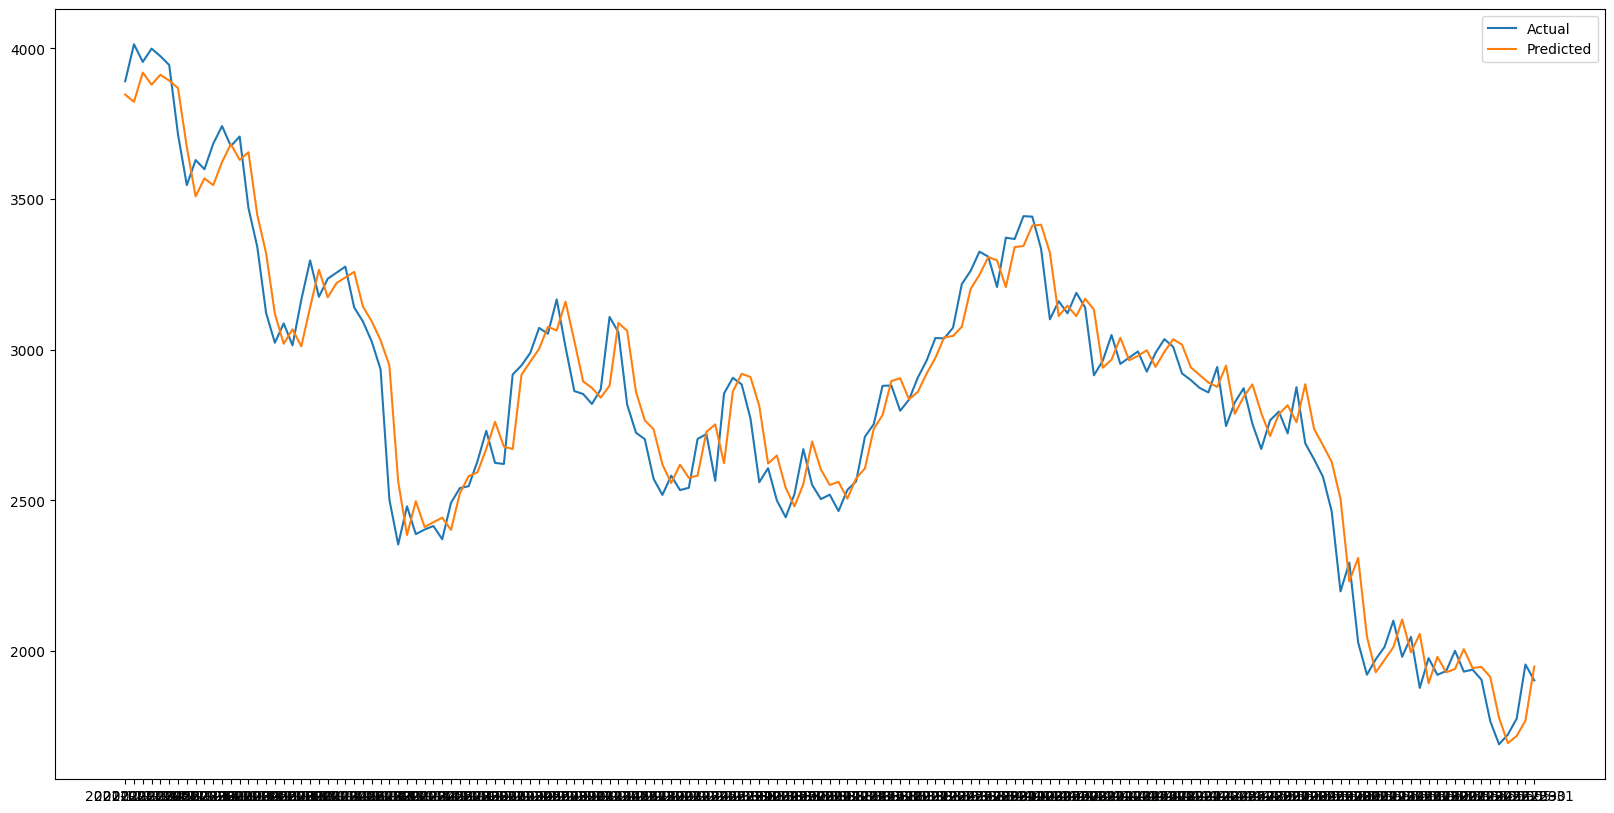

In [43]:
# Plotting the results
plt.figure(figsize = (20, 10))
plt.plot(test_results['Actual'], label = 'Actual')
plt.plot(test_results['Predicted'], label = 'Predicted')
plt.legend()


In [44]:
rmse = np.sqrt(np.mean((test_results['Actual'] - test_results['Predicted']) ** 2))
mae = np.mean(np.abs(test_results['Actual'] - test_results['Predicted']))
print(f'RMSE: {rmse}, MAE: {mae}')

RMSE: 112.90460436017457, MAE: 88.60734452651145
